In [1]:
"""!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip"""

'!wget --no-check-certificate   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip   -O /tmp/cats_and_dogs_filtered.zip'

In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.480.jpg', 'cat.327.jpg', 'cat.767.jpg', 'cat.689.jpg', 'cat.521.jpg', 'cat.727.jpg', 'cat.560.jpg', 'cat.338.jpg', 'cat.751.jpg', 'cat.968.jpg']
['dog.313.jpg', 'dog.740.jpg', 'dog.915.jpg', 'dog.679.jpg', 'dog.219.jpg', 'dog.859.jpg', 'dog.941.jpg', 'dog.288.jpg', 'dog.162.jpg', 'dog.57.jpg']


In [5]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 5
ncols = 5

pic_index = 0

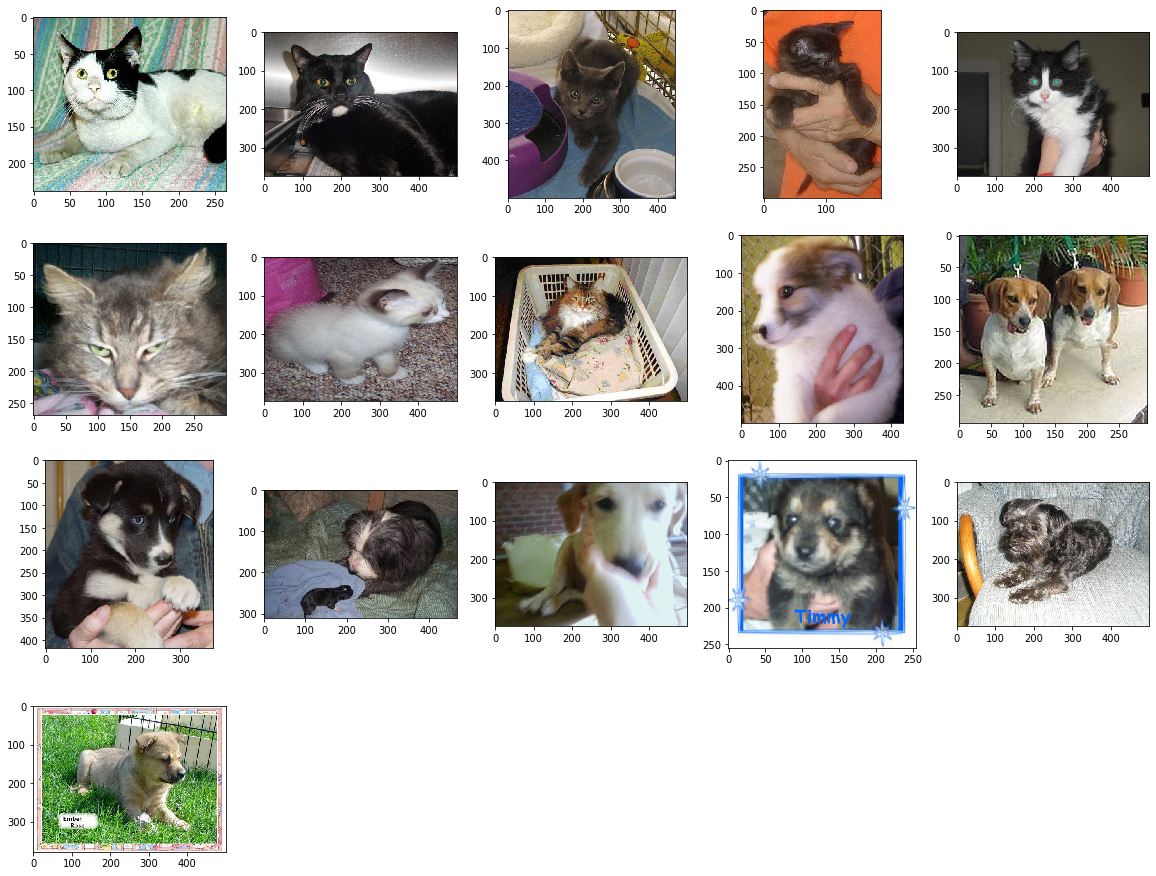

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('On')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics = ['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode  = 'binary', 
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=100, epochs=15, 
                    validation_steps=50,
                              verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 7s - loss: 0.7793 - accuracy: 0.5655 - val_loss: 0.6290 - val_accuracy: 0.6630
Epoch 2/15
100/100 - 6s - loss: 0.6378 - accuracy: 0.6600 - val_loss: 0.6004 - val_accuracy: 0.6860
Epoch 3/15
100/100 - 6s - loss: 0.5668 - accuracy: 0.7165 - val_loss: 0.5692 - val_accuracy: 0.6970
Epoch 4/15
100/100 - 6s - loss: 0.5317 - accuracy: 0.7565 - val_loss: 0.5757 - val_accuracy: 0.7290
Epoch 5/15
100/100 - 6s - loss: 0.4488 - accuracy: 0.8015 - val_loss: 0.5402 - val_accuracy: 0.7300
Epoch 6/15
100/100 - 6s - loss: 0.3535 - accuracy: 0.8430 - val_loss: 0.6681 - val_accuracy: 0.7080
Epoch 7/15
100/100 - 6s - loss: 0.3115 - accuracy: 0.8675 - val_loss: 0.6418 - val_accuracy: 0.7280
Epoch 8/15
100/100 - 6s - loss: 0.2151 - accuracy: 0.9150 - val_loss: 0.8534 - val_accuracy: 0.7140
Epoch 9/15
100/100 - 6s - loss: 0.1618 - accuracy: 0.9355 - val_loss: 0.8704 - val_accuracy: 0.7120
Epoch 1

In [15]:
import numpy as np
from tensorflow import keras
from keras.preprocessing import image

for fn in uploaded.keys():
    path = '
    img = image.load_img(path, target_size=(150,150))
    x=image.img_to_array(img)
    
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])

    if classes[0]>0:
        print(fn + " is a dog")

    else:
        print(fn + " is a cat")

ModuleNotFoundError: No module named 'google.colab'